# Analysis of Movie Remakes
### Author: Chris Allum

In this project, I analyzed movies and their remakes to answer the question: "Are movie remakes worse than the original?". 

With what seems like more and more movies being remade every year, I often hear people complain that movie remakes are ruining the industry and that they are just worse than the original. I want to see if this really is true. Are movie remakes really worse than the original, or is there something else at work. Do people just like to complain, or do people only remember poor remakes? Are the more good remakes than we realize? Lets find out!

In [1]:
%load_ext autoreload
%autoreload 2

## Data Scraping
In this section, I scrape the internet to collect as much data as I can about movies and movie remakes

In the file movie_scraper.py there are a set of functions that scrape Wikipedia and IMDb to collect data. The code block below imports the necessary functions.

In [2]:
# Import functions from movie_scraper.py
from movie_scraper import get_wiki_links, get_imdb_numbers, get_movie_data, clean_dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The first step in collecting movie data is scraping a list of all movies that have ever been remade and their corresponding remakes. To do this, I scrape the following webpages using the requests module and beautiful soup:
- https://en.wikipedia.org/wiki/List_of_film_remakes_(A%E2%80%93M)
- https://en.wikipedia.org/wiki/List_of_film_remakes_(N%E2%80%93Z)

These two webpages contain tables with every movie that has ever been remade. I use requests to pull the raw HTML and beautiful soup to find the individual Wikipedia page links for each movie in the table.

After I have a link to the Wikipedia page for each movie, I again use requests to get the raw HTML of the page and use beautiful soup to find an external link to the movie's IMDb page. Almost every single Wikipedia page for a movie has an IMDb link at the bottom under the section "External Links". 

With a link to the IMDb page of every single movie, I then use a python module called IMDbPY to scrape data from IMDb. I scrape the following data: the name of the original movie, the year it was made, its genre(s), its IMDb rating, and how many people voted on the rating. I also grab the exact same data for this movie's remake. I store these 10 pieces of data in a pandas DataFrame.

To prevent having to rerun this section of code every single time one wants to graph/analyze the data, I save the pandas DataFrame locally as a pickle file called "movie_data.pkl". I am saving the data as a pickle file (as opposed to a more readable file such as a CSV) because it retains more information about the data types within the pandas DataFrame.

Note: This next code block can take a while to run (~25 minutes)

In [3]:
# Get all wikipedia links to movies and their remakes
wiki_dataframe = get_wiki_links()
wiki_dataframe = clean_dataframe(wiki_dataframe)

# Get all the imdb numbers from all wiki pages
imdb_dataframe = get_imdb_numbers(wiki_dataframe)
imdb_dataframe = clean_dataframe(imdb_dataframe)

# Get movie data from imdb pages
movie_dataframe = get_movie_data(imdb_dataframe)
movie_dataframe = clean_dataframe(movie_dataframe)

# Save movie dataframe as pkl file to save time when reloading data
movie_dataframe.to_pickle("./movie_data.pkl")

## Graphing the Data and Results
In this section, I graph the data to see if there are any trends when comparing the remake of a movie to the original. Rather than use the data stored in the variable created in the code blocks above, I am reading the data stored in the file "movie_data.pkl". 

In [4]:
# pull data from pickle file as numpy array
movie_data = pd.read_pickle("./movie_data.pkl").to_numpy()

In the following code block, I graph the quality of movie remakes over time. I define quality as the difference in IMDb rating of the original movie and the remake. A negative score means that the original movie had a higher IMDb rating than the remake and vice versa.

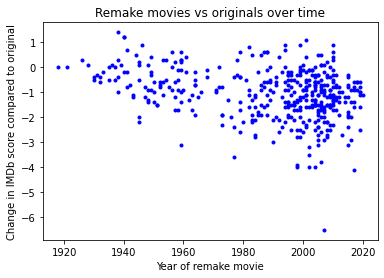

In [5]:
from graph_data import graph_rating_change_by_time

# graph remake movie quality over time
graph_rating_change_by_time(movie_data)

I also wanted to check if there was any trend when sorting movie remakes by category. In the following graph, I compare the average change in IMDb score of a remake for different genres. Currently, only the top 6 movie genres are graphed, but that can be changed by editing the "bars" argument in the graphing function.

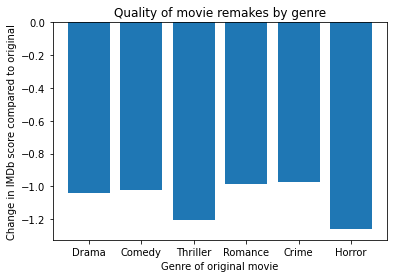

In [7]:
from graph_data import graph_rating_change_by_genre

# graph average change in rating by genre
graph_rating_change_by_genre(movie_data, bars=6)

The graph above doesn't quite give a full picture of how the average ratings of movies change for different genres, as it doesn't include what the original and final ratings are. Qualitatively, there is a big difference in ratings going from 10 to 9 and going from 3 to 2. The following function graphs a bar graph of the same genres, but it only shows the average original rating and the average remake rating. Since for all genres the average rating dropped (as seen in the graph above), the upper bound of the graph is the rating of the original movie and the lower bound is the remake's rating.

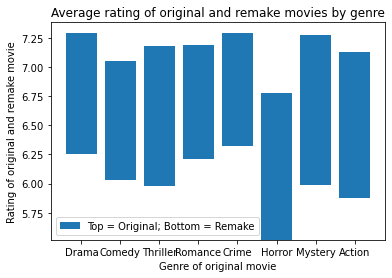

In [7]:
from graph_data import graph_rating_change_by_genre_full

# graph average rating of orignal and remake by genre
graph_rating_change_by_genre_full(movie_data)

Lastly, I wanted to see if there was any trend when looking at remakes if they were sorted by the time difference between the original movie and the remake. I wanted to see if by having more time between the two movies, perhaps, the remake would be better. The function below graphs the change in IMDb rating compared to the length of time (in years) between the two movies.

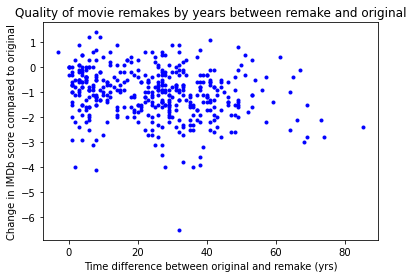

In [8]:
from graph_data import graph_rating_change_by_year_dif

# Graph change in movie rating by difference in year between original and remake
graph_rating_change_by_year_dif(movie_data)

## Conclusion
As demonstrated in the graphs above, in general, movie remakes are consistently worse than the original. There doesn't seem to be any strong trends that indicate that specific types of remakes are better or worse than others. The only trend that I found was that, according to the first graph, there are significantly more remakes now than ever before, and that if anything, the average quality of the remakes are decreasing.

The most difficult part of this project was scraping all of the data from Wikipedia. I had very little prior exposure to HTML, so trying to use beautiful soup to find individual links in a massive webpage was quite difficult for me. I also had difficulty when certain webpages were slightly different from others. For example, there are a few IMDb pages on movies so obscure that there aren't any votes, ratings, or genres listed. Small inconsistencies like this would break my program, and would take me a while to find.

If I had more time, I would have liked a way to better parse/filter the data. It would have been nice to compare movies that are above a certain popularity level. The vast portion of the movies in this analysis are relatively small niche movies. However, when people complain about movie remakes, they tend to complain about big block-buster movies. Perhaps I would find a different result if I only analyzed popular movies. I would also like to improve the robustness of the data scraping. My code is vulnerable to changes in the Wikipedia page. If the format of the pages were to change in the future, this code may no longer work. I would also like to increase the speed at which this code runs. Currently, the main data scraping section can take over 20 minutes. I want to see if there is a way to reduce this time. 